In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit import *
from qiskit.visualization import plot_histogram
%run CnotDecomp.ipynb #for importing ccx function

In [10]:
def incr(qwc,q,subnode,n):
    for j in range(-1,n-1):
        if(j==-1):
            cnx(qwc,subnode,*q[-1::-1])
            qwc.barrier()
        else:
            cnx(qwc,subnode,*q[-1:j:-1])
            qwc.barrier()
    return qwc

def decr(qwc,q,subnode,n):
    qwc.x(subnode)
    c=0
    qwc.x(q[-1:0:-1])
    for j in range(-1,n-1):
        if(j==-1):
            c+=1
            cnx(qwc,subnode,*q[-1::-1])
            qwc.x(q[c])
            qwc.barrier()
        else:
            c+=1
            cnx(qwc,subnode,*q[-1:j:-1])
            if(c==n):
                break
            qwc.x(q[c])
            qwc.barrier()
    qwc.x(subnode)
    return qwc

In [30]:
def decr2(qwc,q,subnode,n):
    qwc.x(subnode[0])
    c=0
    qwc.x(q[-1:0:-1])
    for j in range(-1,n-1):
        if(j==-1):
            c+=1
            cnx(qwc,subnode,*q[-1::-1])
            qwc.x(q[c])
            qwc.barrier()
        else:
            c+=1
            cnx(qwc,subnode,*q[-1:j:-1])
            if(c==n):
                break
            qwc.x(q[c])
            qwc.barrier()
    qwc.x(subnode[0])
    return qwc

def incr2(qwc,q,subnode,n):
    qwc.x(subnode[1])
    for j in range(-1,n-1):
        if(j==-1):
            cnx(qwc,subnode,*q[-1::-1])
            qwc.barrier()
        else:
            cnx(qwc,subnode,*q[-1:j:-1])
            qwc.barrier()
    
    qwc.x(subnode[1])

    return qwc


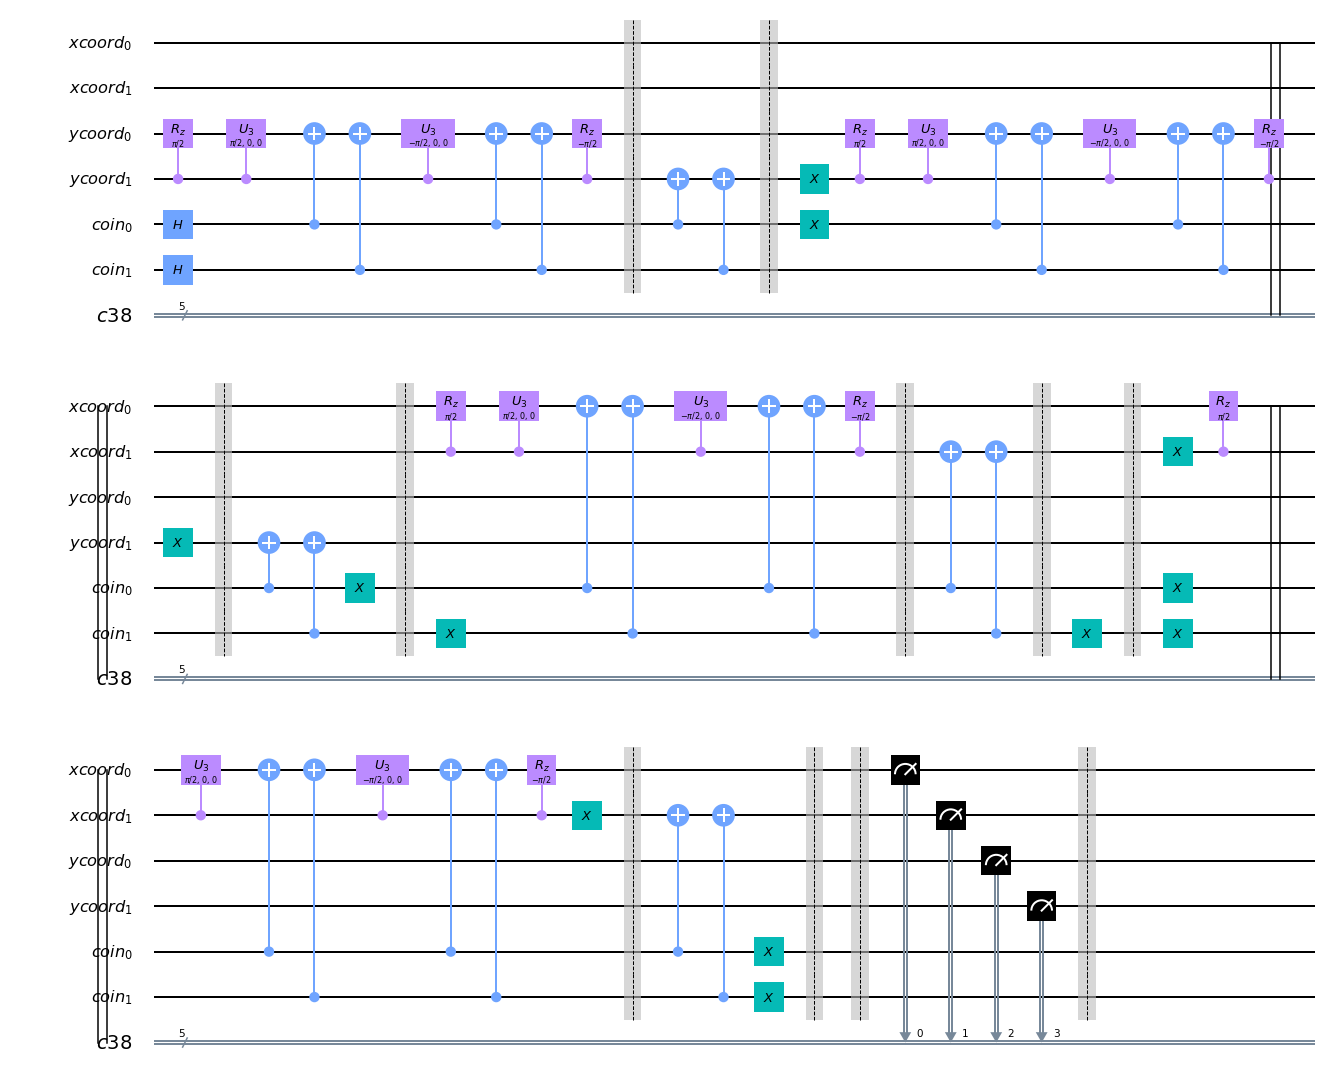

In [46]:
n=2
qregx = QuantumRegister(n,"xcoord")
qregy = QuantumRegister(n,"ycoord")
qcoin = QuantumRegister(n,"coin")
creg = ClassicalRegister(5)


qc = QuantumCircuit(qregx,qregy,qcoin,creg)

def runQWC(qc,times):
    for i in range(0,times):
        qc.h(qcoin)
        incr(qc,qregy,qcoin,n)
        decr2(qc,qregy,qcoin,n)

        qc.barrier()
        incr2(qc,qregx,qcoin,n)
        qc.barrier()
        decr(qc,qregx,qcoin,n)
        qc.barrier()

        qc.barrier()
        qc.measure(qregx[0],creg[0])
        qc.measure(qregx[1],creg[1])

        qc.measure(qregy[0],creg[2])
        qc.measure(qregy[1],creg[3])

        qc.barrier()
    return qc

step=1
qc = runQWC(qc,step)
qc.draw(output='mpl')

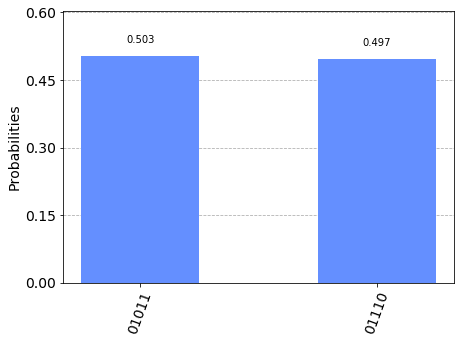

In [47]:
#circuit building
backend = Aer.get_backend('qasm_simulator')
circ1=qc
job_sim = execute(circ1, backend=backend, shots=8192,)
#result = job.result()
result_sim = job_sim.result()
result_counts = result_sim.get_counts(circ1)
plot_histogram(result_counts)

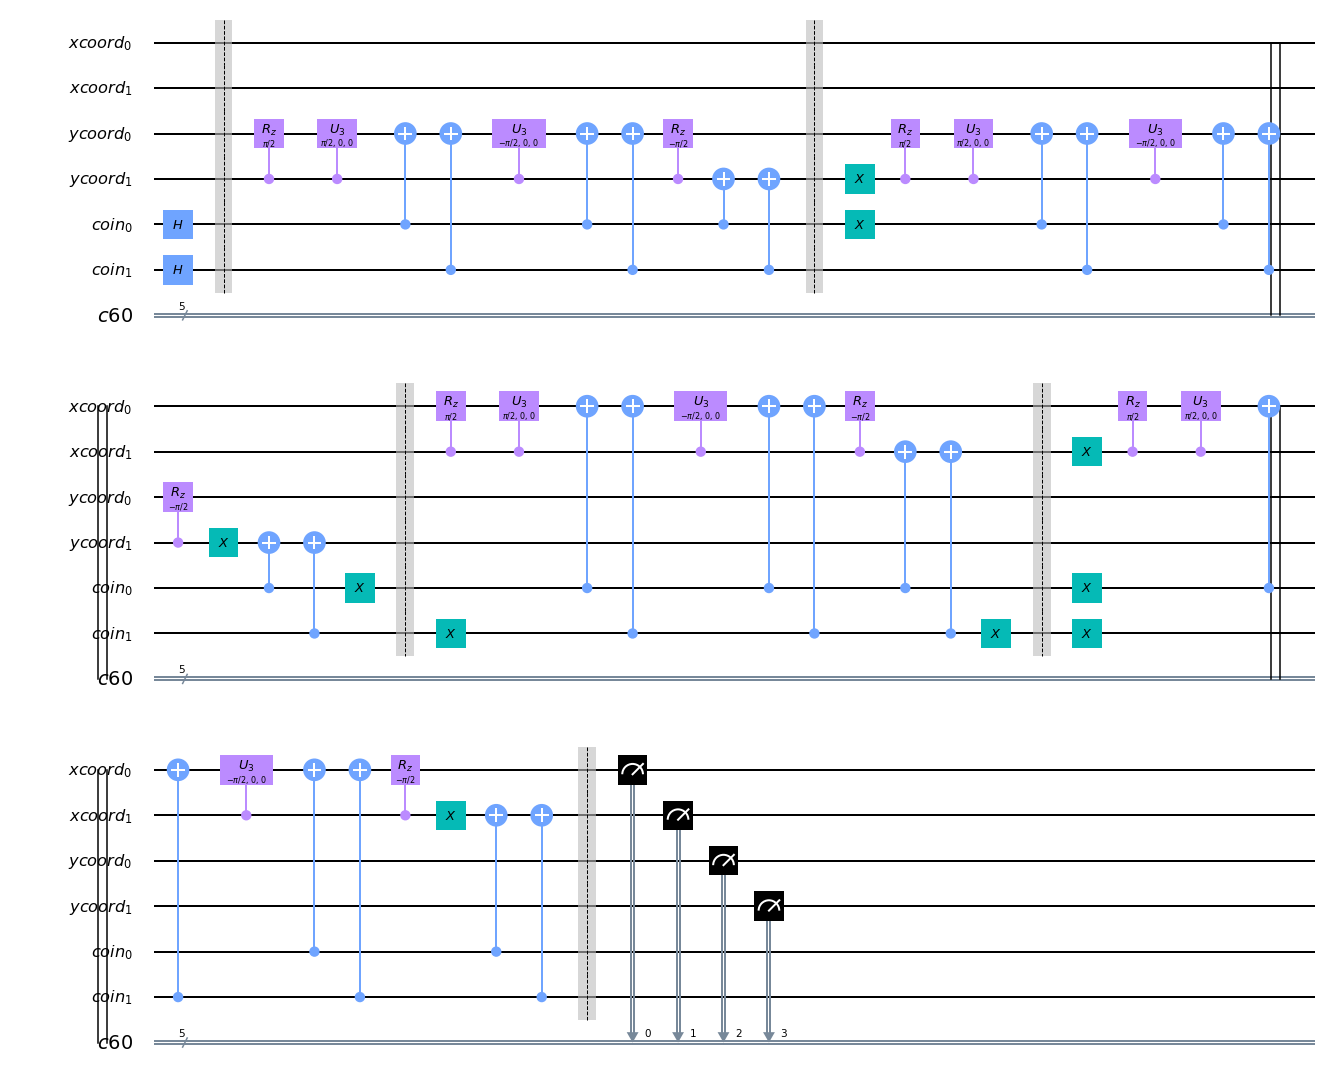

In [69]:
n=2
qregx = QuantumRegister(n,"xcoord")
qregy = QuantumRegister(n,"ycoord")
qcoin = QuantumRegister(n,"coin")
creg = ClassicalRegister(5)


qc1 = QuantumCircuit(qregx,qregy,qcoin,creg)


qc1.h(qcoin)

qc1.barrier()
## INCREMENT Y ##
cnx(qc1,qcoin,qregy[1],qregy[0])
cnx(qc1,qcoin,qregy[1])
## INCREMENT Y ##
qc1.barrier()

## DECREMENT Y ##
qc1.x(qcoin[0])
qc1.x(qregy[1])
cnx(qc1,qcoin,qregy[1],qregy[0])
qc1.x(qregy[1])
cnx(qc1,qcoin,qregy[1])
qc1.x(qcoin[0])
## DECREMENT Y ##
qc1.barrier()


## INCREMENT X ##
qc1.x(qcoin[1])
cnx(qc1,qcoin,qregx[1],qregx[0])
cnx(qc1,qcoin,qregx[1])
qc1.x(qcoin[1])
## INCREMENT X ##
qc1.barrier()

## DECREMENT X ##
qc1.x(qcoin)
qc1.x(qregx[1])
cnx(qc1,qcoin,qregx[1],qregx[0])
qc1.x(qregx[1])
cnx(qc1,qcoin,qregx[1])
qc1.draw(output='mpl')
## DECREMENT X ##
qc1.barrier()

qc1.measure(qregx[0],creg[0])
qc1.measure(qregx[1],creg[1])

qc1.measure(qregy[0],creg[2])
qc1.measure(qregy[1],creg[3])

qc1.draw(output="mpl")

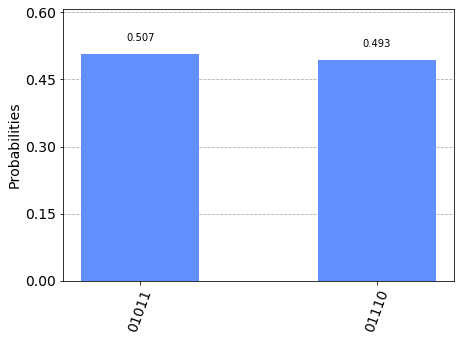

In [70]:
#circuit building
backend = Aer.get_backend('qasm_simulator')
circ1=qc1
job_sim = execute(circ1, backend=backend, shots=8192,)
#result = job.result()
result_sim = job_sim.result()
result_counts = result_sim.get_counts(circ1)
plot_histogram(result_counts)